<a href="https://colab.research.google.com/github/Th4l3s-pr0g/estudo-IA-CC/blob/main/ClusterIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como fizemos nos exercícios anteriores, vamos iniciar importando os dados de Iris.

In [ ]:
import pandas as pd
nomeColunas = ["alturaSepala", "larguraSepala", "alturaPetala", "larguraPetala", "classe"]
dataFrame = pd.read_csv("/content/iris.data", names = nomeColunas)
print("Quantidade de linhas:", len(dataFrame))
print("Quantidaed de colunas:", len(dataFrame.columns))

Quantidade de linhas: 150
Quantidaed de colunas: 5


Uma vez que os dados foram importados, vamos fazer uma análise exploratória.

In [ ]:
dataFrame.tail()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,classe
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Da mesma forma que a regressão linear, a clusterização trabalha bem com dados NUMÉRICOS. Diante disso, vamos ver os tipos dos dados do data frame.

In [ ]:
dataFrame.dtypes

alturaSepala     float64
larguraSepala    float64
alturaPetala     float64
larguraPetala    float64
classe            object
dtype: object

Como proposto nos slides apresentados em sala, vamos testar a eficiência do K-means pedindo para o algoritmo gerar 3 clusters sem saber o tipo de cada flor. Depois iremos comparar os grupos gerados com os tipos reais das flores.
Para o teste ocorrer efetivamente, vamos criar um novo data frame que será uma cópia do data frame orignial sem a coluna da classe da iris

In [ ]:
dataFrameCluster = dataFrame.drop(columns=["classe"])

Uma vez que o dataFrameCluster foi criado, vamos ver como ele ficou. Ele deve ser igual ao original, mas sem a coluna classe.

In [ ]:
dataFrameCluster.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Agora que o dataFrame foi criado, vamos partir para a clusterização propriamente dita. Para isso, a primeira coisa que devemos fazer importar o algoritmo que faz a clusterização. Como explicado durante a aula, o algoritmo mais popular para a aplicação de clusterização é o K-means. O SkLearn possui tal algoritmo.

In [ ]:
from sklearn.cluster import KMeans

Agora que o KMeans foi importado, vamos criar o objeto que fará a clusterização. No caso da  clusterização, ao criar o objeto, é necessário informar a quantidade de grupos que queremos que sejam gerados.

In [ ]:
objCluster = KMeans(n_clusters=2)

Agora que o objeto foi criado e está pronto para fazer a clusterização efetuar o treinamento que irá gerar os grupos.

In [ ]:
objCluster.fit(dataFrameCluster)

KMeans(n_clusters=2)

Uma vez que os três centroides foram gerados, vamos analisar o resultado.

In [ ]:
arrayResultado = objCluster.fit_predict(dataFrameCluster)
arrayResultado

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Vamos criar um novo dataFrame com as colunas das áreas para vermos se o resultado melhora.

In [ ]:
objCluster.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36037736, 1.56226415, 0.28867925]])

Uma vez que vimos os valores dos centroides, vamos ver o gráfico de posição dos centroides considerando altura x largura de petala e altura x largura de sepala.

Text(0, 0.5, 'Largura da Sepala')

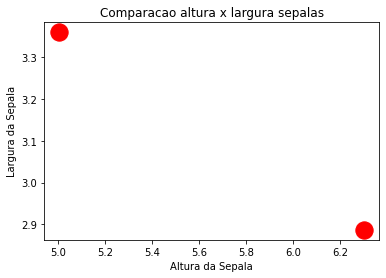

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(objCluster.cluster_centers_[:,0], objCluster.cluster_centers_[:,1], s=300, c="red")
plt.title("Comparacao altura x largura sepalas")
plt.xlabel("Altura da Sepala")
plt.ylabel("Largura da Sepala")

Vamos gerar o mesmom gráfico para ver o gráfico para ver os centroides com relação à altura x largura de petala.

Text(0, 0.5, 'Largura da Petala')

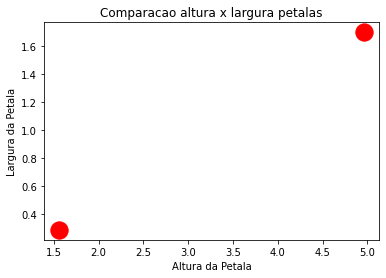

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(objCluster.cluster_centers_[:,2], objCluster.cluster_centers_[:,3], s=300, c="red")
plt.title("Comparacao altura x largura petalas")
plt.xlabel("Altura da Petala")
plt.ylabel("Largura da Petala")

Text(0, 0.5, 'Largura da Sepala')

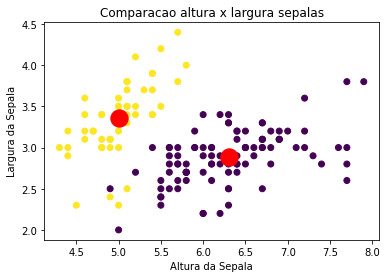

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataFrameCluster.iloc[:,0], dataFrameCluster.iloc[:,1], c=objCluster.labels_)
plt.scatter(objCluster.cluster_centers_[:,0], objCluster.cluster_centers_[:,1], s=300, c="red")
plt.title("Comparacao altura x largura sepalas")
plt.xlabel("Altura da Sepala")
plt.ylabel("Largura da Sepala")

Text(0, 0.5, 'Largura da Petala')

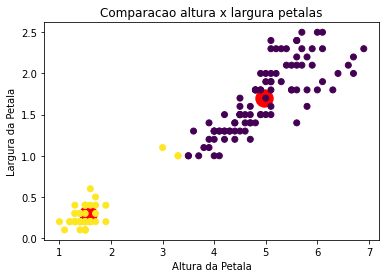

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(objCluster.cluster_centers_[:,2], objCluster.cluster_centers_[:,3], s=300, c="red")
plt.scatter(dataFrameCluster.iloc[:,2], dataFrameCluster.iloc[:,3], c=objCluster.labels_)
plt.title("Comparacao altura x largura petalas")
plt.xlabel("Altura da Petala")
plt.ylabel("Largura da Petala")

Normalmente, há a pergunta de um milhão de dólares: "qual é o número ideal de clusters para o meu conjunto de dados?" Lembre-se que os elementos dentro de um mesmo cluster devem ter similaridade e que os elementos de clusters distintos devem ter discrepância.

Text(0, 0.5, 'Variância')

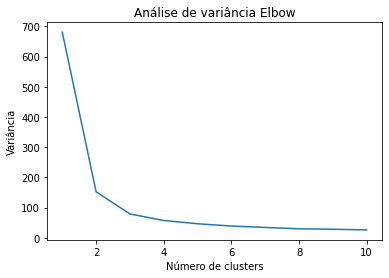

In [ ]:
variancia = []
for i in range (1,11): # o loop será executado dez vezes, criando quantidades de clusters igual ao valor de i
  objClusterElbow = KMeans(n_clusters=i) #configuração do objeto para gerar "i" clusters
  objClusterElbow.fit(dataFrameCluster)
  variancia.append(objClusterElbow.inertia_)

variancia

plt.plot(range(1,11), variancia)
plt.title("Análise de variância Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("Variância")